<a href="https://colab.research.google.com/github/ISRAEL-MP/Practica0_Comentario_codigo_-limpio/blob/main/Red_neuronal_resumen_texto_traductor_de_idioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RED NEURONAL Y RESUMEN DE TEXTO

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


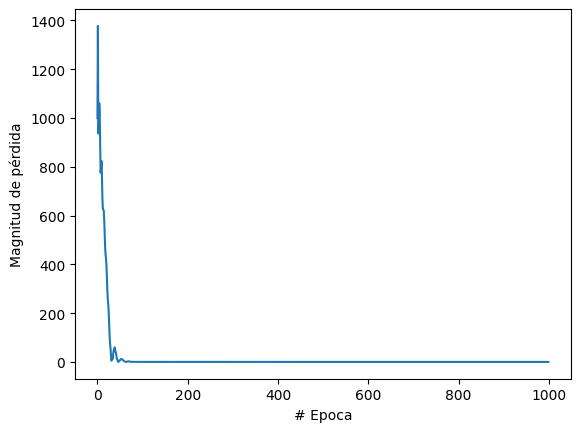

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 272ms/step
El resultado es [[211.74718]] fahrenheit!


In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.1618061 , -0.8255279 ,  0.23721541]], dtype=float32), array([-2.5032969, -3.3041465,  3.2651834], dtype=float32)]
[array([[-1.2648865 , -0.19161624,  0.2572157 ],
       [-0.92636263, -0.25142193,  0.79544455],
       [ 0.7298859 ,  0.9664371 , -1.0053061 ]], dtype=float32), array([ 3.3598788,  3.3113306, -3.3915792], dtype=float32)]
[array([[ 1.0216275],
       [ 1.3736011],
       [-0.5758094]], dtype=float32), array([3.3132272], dtype=float32)]


RESUMIDOR DE TEXTO

In [ ]:
fileref=open(archivo)
texto=fileref.read()


fileref.close()

In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
>>> from transformers import pipeline

>>> summarizer = pipeline("summarization")

>>> ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
... A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
... Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
... In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
... Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
... 2010 marriage license application, according to court documents.
... Prosecutors said the marriages were part of an immigration scam.
... On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
... After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
... Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
... All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
... Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
... Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
... The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
... Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
... Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
... If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
... """

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [30]:
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


In [31]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer("summarize: " + ARTICLE, return_tensors="pt", max_length=512, truncation=True)
outputs = model.generate(
    inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True
)

print(tokenizer.decode(outputs[0]))

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


<pad> prosecutors say the marriages were part of an immigration scam. if convicted, barrientos faces two criminal counts of "offering a false instrument for filing in the first degree" she has been married 10 times, nine of them between 1999 and 2002.</s>


In [32]:
>>> from transformers import pipeline

>>> translator = pipeline("translation_en_to_de")
>>> print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


[{'translation_text': 'Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.'}]


In [38]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")

inputs = tokenizer(
    "translate English to German: Hugging Face is a technology company based in New York and Paris",
    return_tensors="pt"
)
outputs = model.generate(inputs["input_ids"], max_length=40, num_beams=4, early_stopping=True)

print(tokenizer.decode(outputs[0]))

<pad> Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.</s>
